## Дано:
* Датафрейм с 4 признаками : (status, income, age, date)
* status: (Student, Pensioneer, Working, Businessman)
* income - доход в месяц
* age - возраст
* date - дата

## Нужно сделать:
* Провести разведочный анализ: describe(), кол-во пропусков, выбросов, построить boxplot и тп.
* Заполнить(удалить) пропуски, заменить(удалить) выбросы, кратко аргументировать замены. 
* Получить датафрейм с качественными данными
* Графически показать данные до/после (scatterplot, (x,y,hue))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter



In [2]:
homework = pd.read_csv(
    r"C:\Users\Denis\Desktop\ds\credit_scoring\data\HW\Выбросы, пропуски\HomeWork.csv",
    index_col=0,
    parse_dates=['date']
    )


In [3]:
def general_information(data):
    display(data.info())
    display(data.head(5))
    display(data.describe().T)
    display(data.isna().sum())
    if not data.select_dtypes(include='object').empty:
        description = data.describe(include='object')
        display(description)

    if data.select_dtypes(include=[np.number]).columns.size > 0:
        data.hist(figsize=(20, 10))
        plt.show()
        
    categorical_cols = data.select_dtypes(include='object')
    if not categorical_cols.empty:
        for col in categorical_cols.columns:
            plt.figure(figsize=(20, 6))
            categorical_counts = data[col].value_counts()
            categorical_counts.plot(kind='bar')
            plt.title(f'Распределение {col}')
            plt.xlabel(col)
            plt.ylabel('Частота')
            plt.xticks(rotation=45)
            plt.show()
        
    else:
        print("Нет числовых данных для визуализации.")

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   status  490 non-null    object        
 1   income  430 non-null    float64       
 2   age     441 non-null    float64       
 3   date    500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 19.5+ KB


None

,status,income,age,date
0,Student,4000.0,18.0,2022-01-23
1,Pensioner,NaN,91.0,2022-01-19
2,Student,4000.0,18.0,2022-01-03
3,Student,0.0,NaN,2022-01-13
4,Pensioner,5000.0,87.0,2022-01-31


,count,mean,min,25%,50%,75%,max,std
income,430.0,152020.623256,-13745.0,2000.0,21000.0,217000.0,992000.0,242647.036978
age,441.0,46.362812,0.0,23.0,44.0,68.0,99.0,25.036517
date,500,2022-01-16 05:48:28.800000256,2022-01-01 00:00:00,2022-01-09 00:00:00,2022-01-16 00:00:00,2022-01-24 00:00:00,2022-02-01 00:00:00,NaN


status    10
income    70
age       59
date       0
dtype: int64

,status
count,490
unique,4
top,Student
freq,145


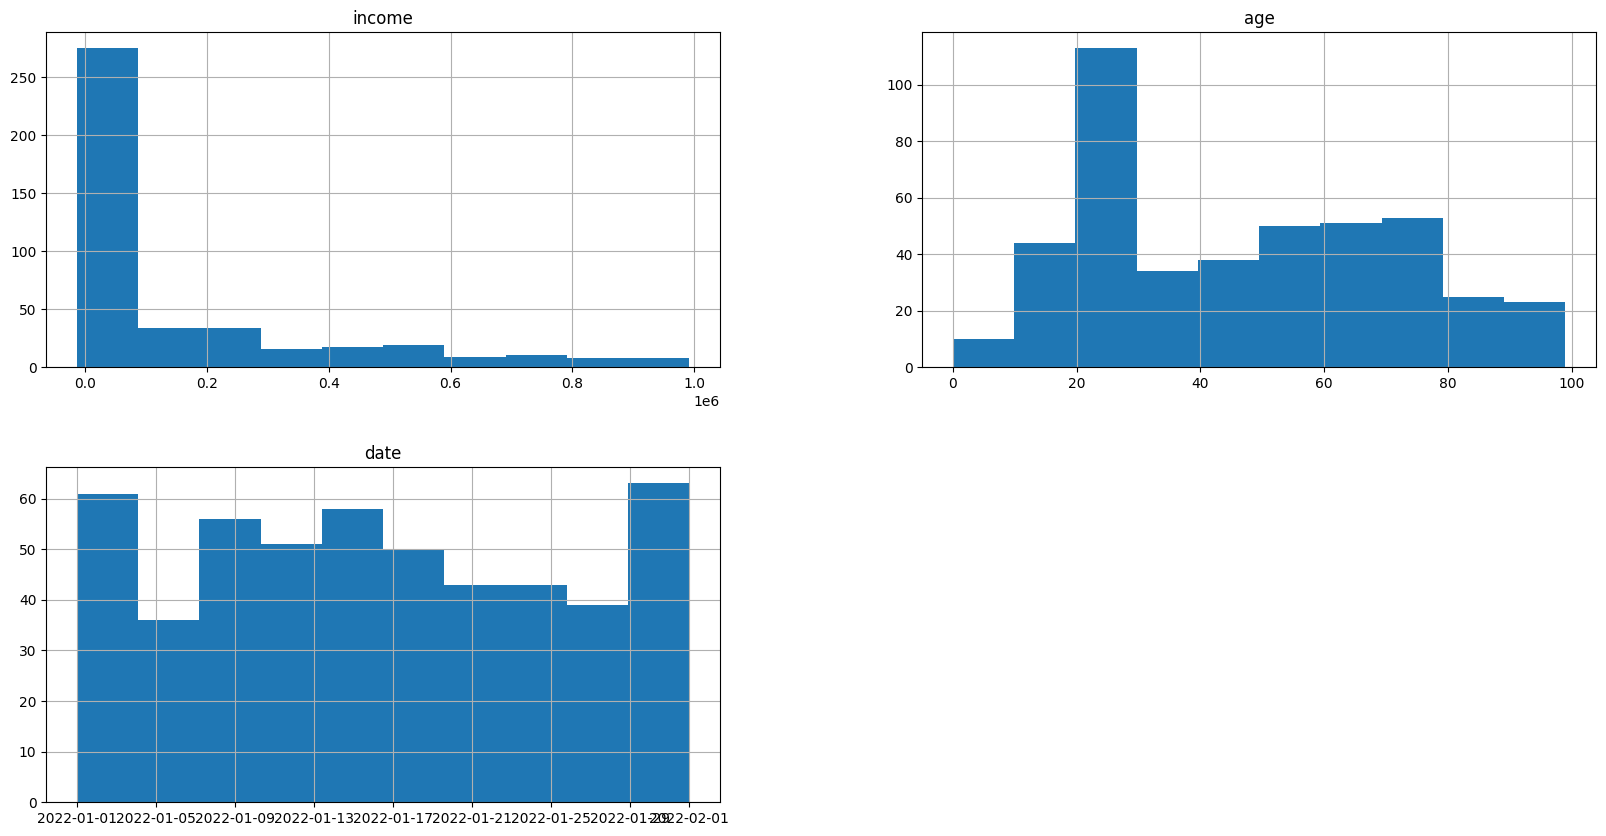

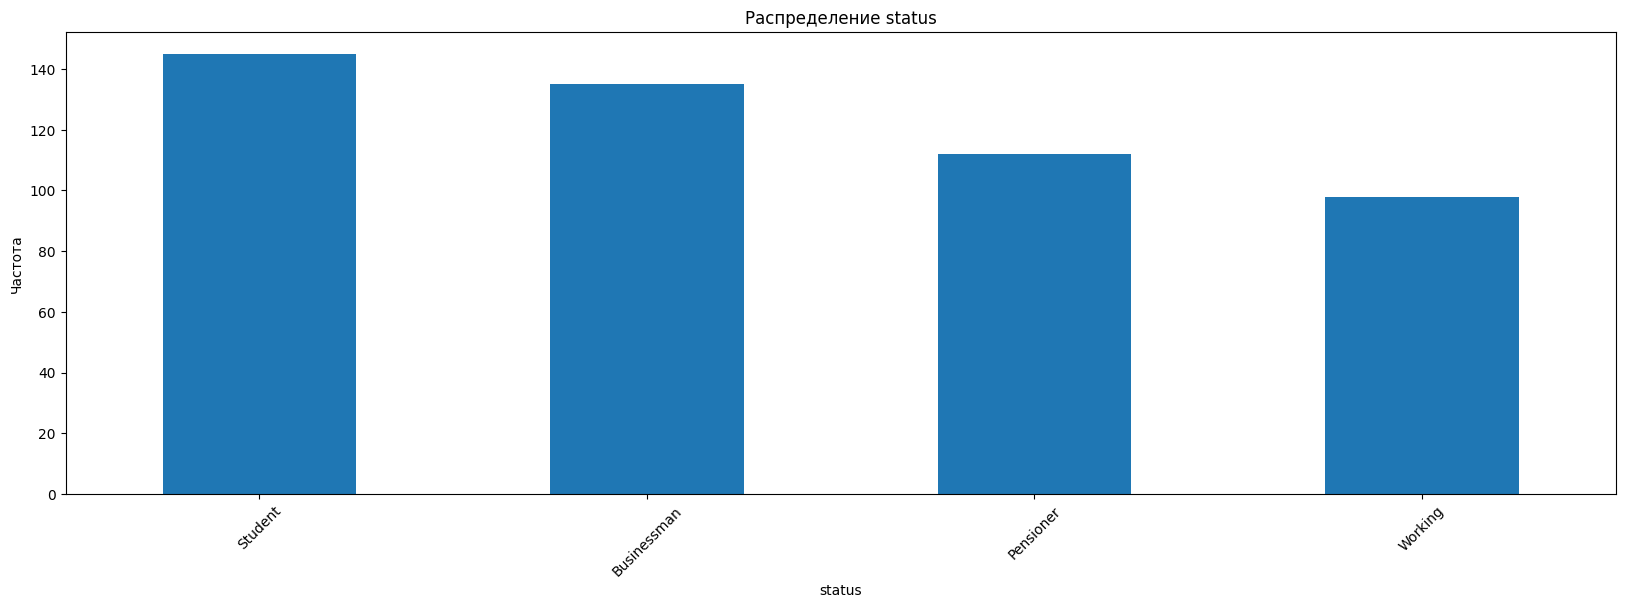

In [4]:
general_information(homework)

Выводы превичного анализа данных:
* Видим наличие пропусков:
```
status    10
income    70
age       59
```
* Интересный момент в признаке income, минимальное - отрицательное число, а максимальное - близкое к миллиону, интересно как можно иметь минусовый заработок, или же наоборот, получать почти в 5 раз больше, чем среднее по выборке, медиана смещена влево относительно среднего что гласит о том, что распределение имеет смещение влево из-за большого кол-ва значений около 0

* Минимальный возраст равен 0, что немного странно, может быть это тот самый младенец, который только родился и уже должен)
максимальный возраст - 99 лет, выглядит реалистично, нужны дополнительные проверки

* Статус пока что ничем не выделяется, можем подметить лёгкий дисбалан категориального признака



Преобразуем признак заработка, разделим значения на 1000

In [5]:
homework['income'] = homework['income'] / 1000

Для начала давайте посмотрим на неправдвподобные данные

In [6]:
anamalia = homework[(homework['income'] < 0) | (homework['age'] <= 0)]
anamalia

,status,income,age,date
15,Working,-2.658,42.0,2022-01-31
19,Student,-12.222,20.0,2022-01-11
21,Working,-9.399,38.0,2022-01-07
25,Student,-9.219,19.0,2022-01-11
26,Student,-12.362,21.0,2022-01-16
...,...,...,...,...
483,Working,-6.296,34.0,2022-01-06
485,Student,-2.112,20.0,2022-01-01
487,Businessman,-9.375,46.0,2022-01-26
489,Pensioner,-7.564,96.0,2022-01-04


Нужно уточнить у владельца данных, что может являться причиной таких данных,
пока что есть только предположение, что люди указывая возрост прописыпали - как тире, но не иммели ввиду отрицательный заработок, поэтому давайт уберём у данных -

In [7]:
homework['income'] = homework['income'].abs()

Отлично, теперь повнимательнее посмотрим на "Новорождённых"

In [8]:
homework[homework['age'] <= 0]

,status,income,age,date
81,Businessman,8.212,0.0,2022-01-10
203,Student,0.000,0.0,2022-01-31
235,Student,3.000,0.0,2022-01-16
312,Businessman,168.000,0.0,2022-01-25
313,Working,167.000,0.0,2022-01-16
359,NaN,30.000,0.0,2022-01-05
385,Student,NaN,0.0,2022-01-23
434,Student,0.000,0.0,2022-01-19
452,Student,5.000,0.0,2022-01-31
490,Businessman,344.000,0.0,2022-01-19


In [9]:
homework.loc[homework['age'] <= 0, 'age'] = np.nan

Так как это не возможно, заменим эти значения пропусками, а дальше по мере заполнения этих пропусков и избавимся от них

Перед тем как заполнять пропуски, даваййте посмотрим на распределения признаков и построим для них боксплот, чтобы увидить анамалии

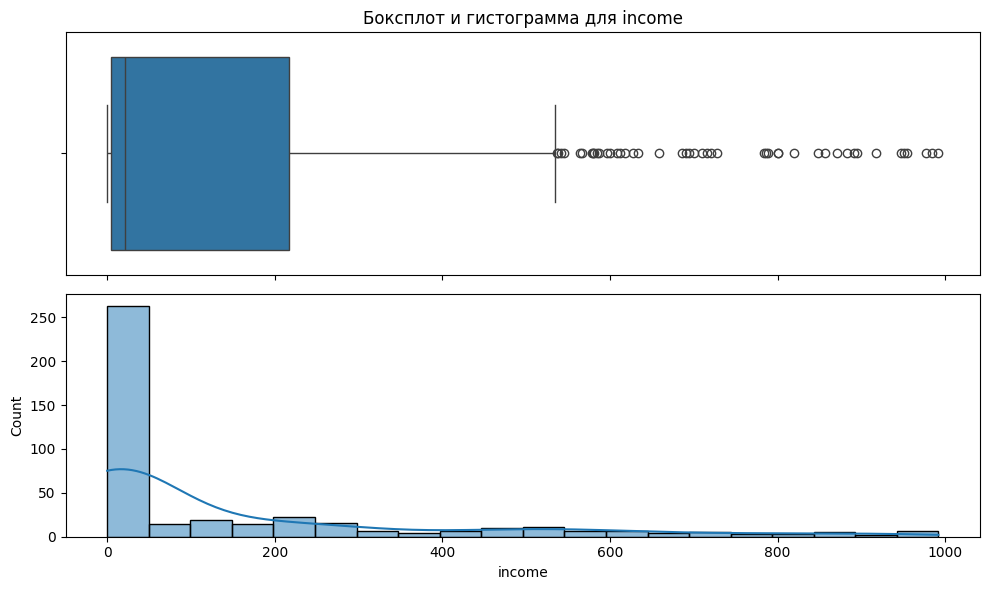

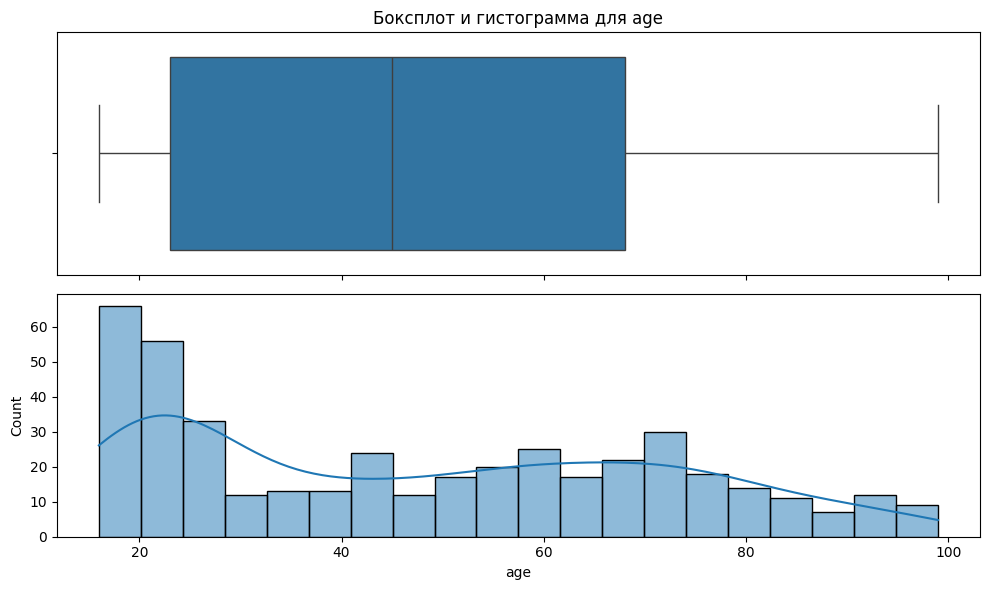

In [10]:
columns = homework.select_dtypes(include=['number']).columns
def px_box(data, column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6))
    sns.boxplot(data=data, x=column, ax=ax_box)
    sns.histplot(data[column], ax=ax_hist, bins=20, kde=True)
    ax_box.set_title(f'Боксплот и гистограмма для {column}')
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=column)
    plt.tight_layout()
    plt.show()
for column in columns:
    px_box(homework, column)

Можем подметить, что обнаруженно очень много анамалий в признаке income, но так ли это на самом деле

Посмотрим на признаки более подробно

<Figure size 2000x2000 with 0 Axes>

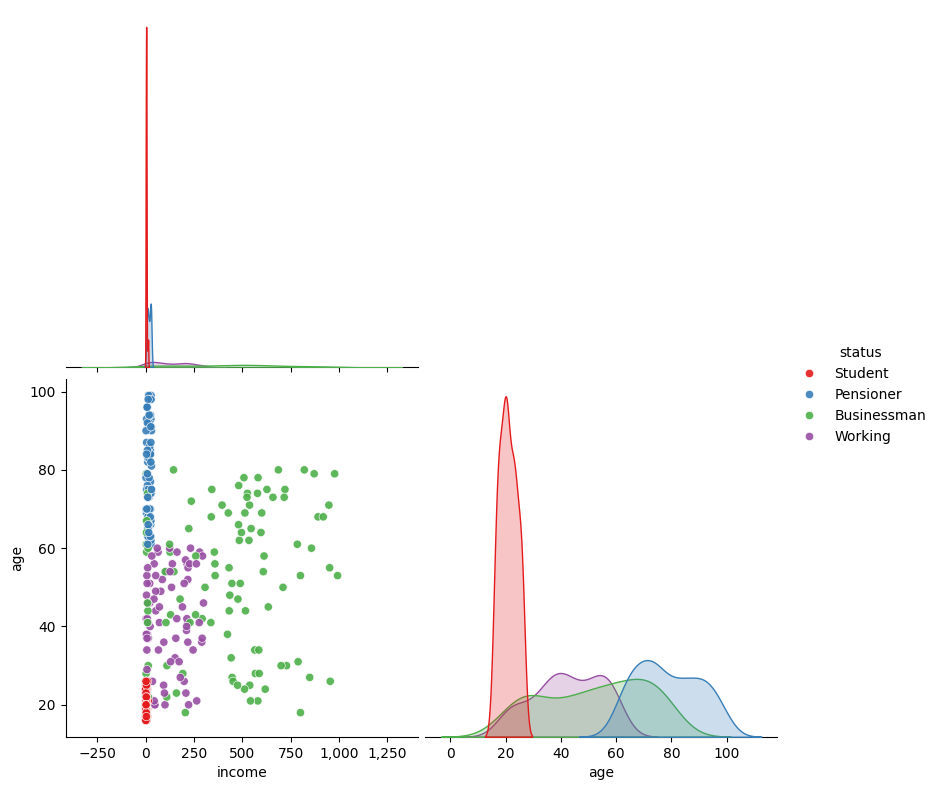

In [11]:
homework_no_index = homework.reset_index(drop=True)
plt.figure(figsize=(20, 20))
pairplot = sns.pairplot(
    homework_no_index, 
    hue='status',   # Ключ для группировки
    kind="scatter", 
    diag_kind="kde", # Для отображения диагональных графиков
    plot_kws={'alpha': 0.9},  # Задаем прозрачность точек
    palette='Set1',  # Цветовая палитра
    corner=True,
    height=4
)
for ax in pairplot.axes.flatten():  # Проходим по всем осям
    if ax is not None:  # Проверяем, что ось существует
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Формат для оси X
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Формат для оси Y
# Отображение графика
plt.show() # Отображаем график

Видим, что высокие значения income принадлежат только бизнесменам, что не является удивительным для нас, значит это не анамалии, а являются нормальными для этой подгруппы, ведь данные в этой категории распределяются равномерно

Из этого графика чётко выделяются несколько подгрупп:
* Люди всех возрастов с заработком более 350т имеют статус businessman
* Люди с возрастом до 26 лет и заработком близким к нулю, преимущественно имеют статус student
* Люди с заработком близким к нулю, и возрастом более 60 лет, преимущественно имеют статус pensioner

Так как люди со статусом working и businessman имеют нахлёст на распределении, их очень сложно отличить, для того чтобы лучше увидеть student и pensioner в дальнейшем мы отсортируем всех businessman и рассмотрим более внимательно

Видим странную ситуацию на распределении признака возраст, имеется некий всплеск студентов в возросте близком к нулю, вероятно это связанно с тем, что для детей нет отдельной категории, и была использованна наиболее подходящая

Посмотрим сколько пропусков у нас имеется в бизнесменах с заработком более 350т, а так же добавим в выборку тех, кто находится в возрасте от 15 до 80 лет и имеет статус бизнесмен

In [12]:
income_filter = homework[homework['income'] >= 300]
age_status_filter = homework[(homework['age'] >= 15) & (homework['age'] <= 80) & (homework['status'] == 'Businessman')]
income_status_filter = homework[(homework['status'] == 'Businessman') & (homework['income'] >= 300)]


filtered_data = pd.concat([income_filter, age_status_filter]).drop_duplicates()
filtered_data = pd.concat([filtered_data, income_status_filter]).drop_duplicates()
missing_values = filtered_data.isna().sum()
print(f"{filtered_data}\n{missing_values}")

          status   income   age       date
7    Businessman  658.000  73.0 2022-01-14
13   Businessman  538.000  25.0 2022-01-03
20   Businessman  526.000  74.0 2022-01-19
23   Businessman  534.000  62.0 2022-01-15
24   Businessman  537.000  71.0 2022-01-09
..           ...      ...   ...        ...
446  Businessman  229.000  41.0 2022-01-03
447  Businessman   10.560  74.0 2022-01-17
457  Businessman  124.000  61.0 2022-01-10
487  Businessman    9.375  46.0 2022-01-26
497  Businessman  258.000  43.0 2022-01-12

[126 rows x 4 columns]
status     1
income    12
age        7
date       0
dtype: int64


Значит у нас уже есть возможность заполнить пропуски в этих данных

In [13]:
# Заполняем только пропущенные значения в столбце 'status' значением 'Businessman'
homework.loc[homework['income'] >= 300, 'status'] = 'Businessman'


# Заполняем только пропущенные значения в столбце 'age' медианным значением
median_age = homework.loc[homework['income'] >= 300, 'age'].median()
homework.loc[homework['income'] >= 300, 'age'] = homework.loc[homework['income'] >= 300, 'age'].fillna(median_age)


# Заполняем только пропущенные значения в столбце 'income' медианным значением
median_income = homework.loc[homework['status'] >= 'Businessman', 'income'].median()
homework.loc[homework['status'] >= 'Businessman', 'income'] = homework.loc[homework['status'] >= 'Businessman', 'income'].fillna(median_income)

Проверяем

In [14]:
income_filter = homework[homework['income'] >= 300]
age_status_filter = homework[(homework['age'] >= 15) & (homework['age'] <= 80) & (homework['status'] == 'Businessman')]
income_status_filter = homework[(homework['income'] >= 300) & (homework['status'] == 'Businessman')]

filtered_data = pd.concat([income_filter, age_status_filter]).drop_duplicates()
filtered_data = pd.concat([filtered_data, income_status_filter]).drop_duplicates()
missing_values = filtered_data.isna().sum()
print(f"{filtered_data}\n{missing_values}")

          status   income   age       date
7    Businessman  658.000  73.0 2022-01-14
13   Businessman  538.000  25.0 2022-01-03
20   Businessman  526.000  74.0 2022-01-19
23   Businessman  534.000  62.0 2022-01-15
24   Businessman  537.000  71.0 2022-01-09
..           ...      ...   ...        ...
446  Businessman  229.000  41.0 2022-01-03
447  Businessman   10.560  74.0 2022-01-17
457  Businessman  124.000  61.0 2022-01-10
487  Businessman    9.375  46.0 2022-01-26
497  Businessman  258.000  43.0 2022-01-12

[126 rows x 4 columns]
status    0
income    0
age       0
date      0
dtype: int64


Отлично!

Теперь во избежание путаницы отфильтруем все строки, которые содержат status = businessman

In [15]:
df_copy = homework[homework['status'] != 'Businessman'].copy()
df_copy

,status,income,age,date
0,Student,4.0,18.0,2022-01-23
1,Pensioner,21.0,91.0,2022-01-19
2,Student,4.0,18.0,2022-01-03
3,Student,0.0,NaN,2022-01-13
4,Pensioner,5.0,87.0,2022-01-31
...,...,...,...,...
494,Pensioner,9.0,85.0,2022-01-06
495,Pensioner,28.0,NaN,2022-01-30
496,Pensioner,16.0,64.0,2022-01-20
498,Student,4.0,17.0,2022-01-19


<Figure size 2000x2000 with 0 Axes>

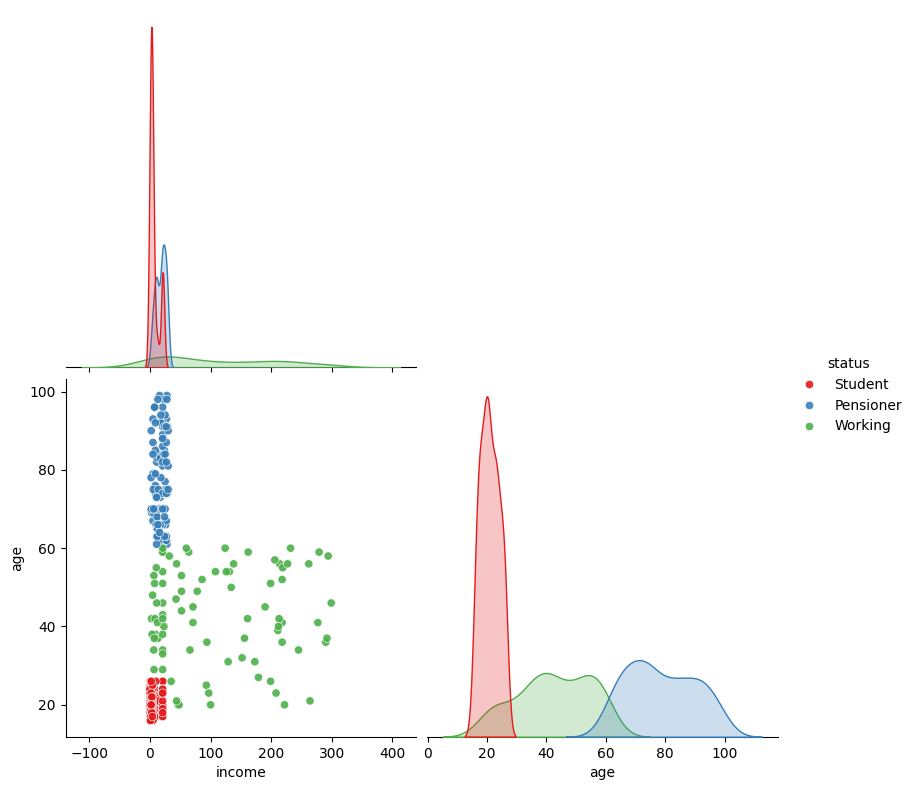

In [16]:
df_copy = df_copy.reset_index(drop=True)
plt.figure(figsize=(20, 20))
pairplot = sns.pairplot(
    df_copy, 
    hue='status',   # Ключ для группировки
    kind="scatter", 
    diag_kind="kde", # Для отображения диагональных графиков
    plot_kws={'alpha': 0.9},  # Задаем прозрачность точек
    palette='Set1',  # Цветовая палитра
    corner=True,
    height=4
)
for ax in pairplot.axes.flatten():  # Проходим по всем осям
    if ax is not None:  # Проверяем, что ось существует
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Формат для оси X
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Формат для оси Y
# Отображение графика
plt.show() # Отображаем график

Теперь можем заметить, что все пенсионеры с возростом больше 60 лет, и с  заработком < 50т. Отфильтруем эти данные

In [17]:

income_filter = df_copy[(df_copy['income'] < 50) & (df_copy['age'] >= 60)]
age_status_filter =  df_copy[(df_copy['age'] >= 60) &(df_copy['status'] == 'Pensioner')]
income_status_filter = df_copy[(df_copy['income'] < 50) & (df_copy['status'] == 'Pensioner')]

filtered_data = pd.concat([income_filter, age_status_filter]).drop_duplicates()
filtered_data = pd.concat([filtered_data, income_status_filter]).drop_duplicates()
missing_values = filtered_data.isna().sum()
print(f"{filtered_data}\n{missing_values}")

        status  income   age       date
1    Pensioner  21.000  91.0 2022-01-19
4    Pensioner   5.000  87.0 2022-01-31
7    Pensioner  21.000  92.0 2022-01-05
10   Pensioner   5.000  67.0 2022-01-02
18   Pensioner  13.000  68.0 2022-01-25
..         ...     ...   ...        ...
269  Pensioner  20.000   NaN 2022-01-27
322  Pensioner   9.709   NaN 2022-01-27
340  Pensioner  18.000   NaN 2022-01-20
357  Pensioner   5.000   NaN 2022-01-12
360  Pensioner  28.000   NaN 2022-01-30

[115 rows x 4 columns]
status     2
income     0
age       16
date       0
dtype: int64


Вот мы на изолированных данных, видим что имееются пропуски и тут, и у нас есть прекрасная возможность их заполнить

In [18]:
homework.loc[
    (homework['income'] < 50) & (homework['age'] >= 60), 'status'] = 'Pensioner'
median_age = homework.loc[homework['status'] == "Pensioner", 'age'].median()
homework.loc[
    (homework['income'] < 50) & (homework['age'] >= 60), 'age'] = homework.loc[
    (homework['income'] < 50) & (homework['age'] >= 60), 'age'].fillna(median_age)

Проверяем...

In [19]:
df_copy = homework[homework['status'] != 'Businessman'].copy()
income_filter = df_copy[(df_copy['income'] < 50) & (df_copy['age'] >= 60)]
age_status_filter =  df_copy[(df_copy['age'] >= 60) &(df_copy['status'] == 'Pensioner')]

filtered_data = pd.concat([income_filter, age_status_filter]).drop_duplicates()
missing_values = filtered_data.isna().sum()
print(f"{filtered_data}\n{missing_values}")

        status  income   age       date
1    Pensioner  21.000  91.0 2022-01-19
4    Pensioner   5.000  87.0 2022-01-31
8    Pensioner  21.000  92.0 2022-01-05
12   Pensioner   5.000  67.0 2022-01-02
22   Pensioner  13.000  68.0 2022-01-25
..         ...     ...   ...        ...
489  Pensioner   7.564  96.0 2022-01-04
491  Pensioner  24.000  63.0 2022-01-30
494  Pensioner   9.000  85.0 2022-01-06
496  Pensioner  16.000  64.0 2022-01-20
499  Pensioner   5.000  84.0 2022-01-03

[112 rows x 4 columns]
status    0
income    0
age       0
date      0
dtype: int64


Отлично! Идём дальше.

<Figure size 2000x2000 with 0 Axes>

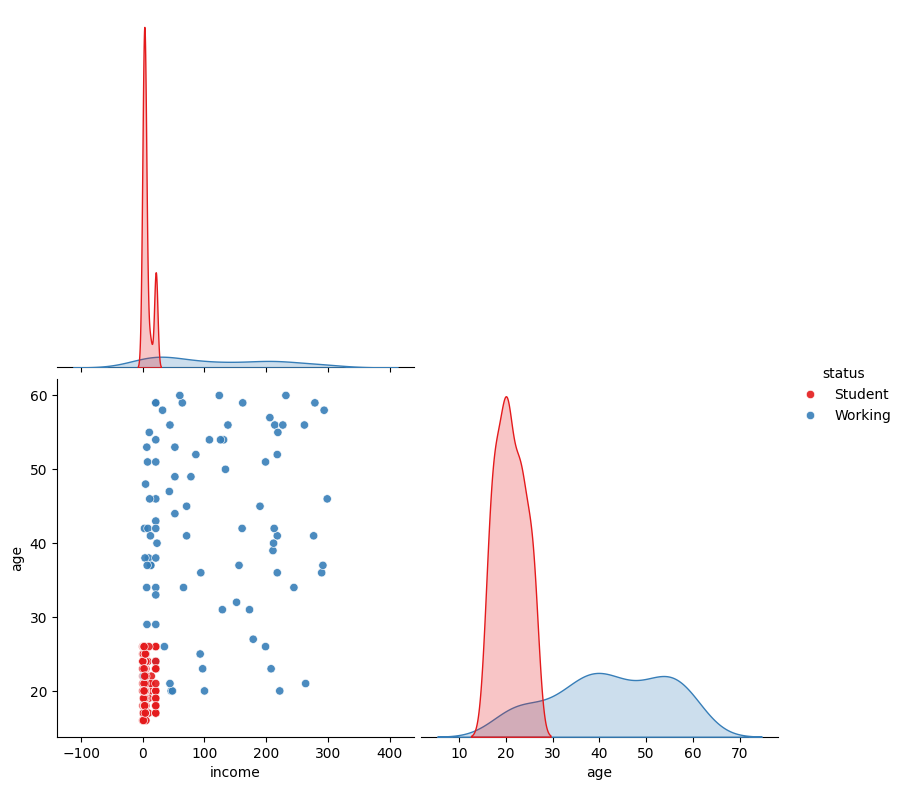

In [20]:
df_copy = df_copy[~df_copy['status'].isin(['Businessman', 'Pensioner'])].copy()

plt.figure(figsize=(20, 20))
pairplot = sns.pairplot(
    df_copy, 
    hue='status',   # Ключ для группировки
    kind="scatter", 
    diag_kind="kde", # Для отображения диагональных графиков
    plot_kws={'alpha': 0.9},  # Задаем прозрачность точек
    palette='Set1',  # Цветовая палитра
    corner=True,
    height=4
)
for ax in pairplot.axes.flatten():  # Проходим по всем осям
    if ax is not None:  # Проверяем, что ось существует
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Формат для оси X
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Формат для оси Y
# Отображение графика
plt.show() # Отображаем график

Видим, что студент имеет заработок < 25т и возраст до 28 лет

In [21]:
income_filter = df_copy[(df_copy['income'] <= 25) & (df_copy['age'] < 28)]
age_status_filter =  df_copy[(df_copy['age'] < 28) &(df_copy['status'] == 'Student')]
income_status_filter = df_copy[(df_copy['income'] <= 25) & (df_copy['status'] == 'Student')]

filtered_data = pd.concat([income_filter, age_status_filter]).drop_duplicates()
filtered_data = pd.concat([filtered_data, income_status_filter]).drop_duplicates()
missing_values = filtered_data.isna().sum()
print(f"{filtered_data}\n{missing_values}")

      status  income   age       date
0    Student     4.0  18.0 2022-01-23
2    Student     4.0  18.0 2022-01-03
5    Student     1.0  20.0 2022-01-25
6    Student     2.0  22.0 2022-01-14
11   Student     4.0  18.0 2022-01-26
..       ...     ...   ...        ...
434  Student     0.0   NaN 2022-01-19
438  Student     4.0   NaN 2022-01-05
452  Student     5.0   NaN 2022-01-31
470  Student    21.0   NaN 2022-01-13
488  Student     4.0   NaN 2022-01-16

[142 rows x 4 columns]
status     0
income     0
age       24
date       0
dtype: int64


Отлично можем заполнять пропуски

In [22]:
median_age = homework.loc[homework['status'] == 'Student', 'age'].median()
homework.loc[
    homework['status'] == 'Student', 'age'] = homework.loc[
    homework['status'] == 'Student', 'age'].fillna(median_age)

Проверяем 

In [23]:
df_copy = homework.copy()
income_filter = df_copy[(df_copy['income'] <= 25) & (df_copy['age'] < 28)]
age_status_filter =  df_copy[(df_copy['age'] < 28) &(df_copy['status'] == 'Student')]
income_status_filter = df_copy[(df_copy['income'] <= 25) & (df_copy['status'] == 'Student')]

filtered_data = pd.concat([income_filter, age_status_filter]).drop_duplicates()
filtered_data = pd.concat([filtered_data, income_status_filter]).drop_duplicates()
missing_values = filtered_data.isna().sum()
print(f"{filtered_data}\n{missing_values}")

      status  income   age       date
0    Student   4.000  18.0 2022-01-23
2    Student   4.000  18.0 2022-01-03
3    Student   0.000  21.0 2022-01-13
5    Student   1.000  20.0 2022-01-25
6    Student   2.000  22.0 2022-01-14
..       ...     ...   ...        ...
478  Student   3.000  18.0 2022-01-29
485  Student   2.112  20.0 2022-01-01
488  Student   4.000  21.0 2022-01-16
493  Student   2.000  20.0 2022-01-10
498  Student   4.000  17.0 2022-01-19

[143 rows x 4 columns]
status    0
income    0
age       0
date      0
dtype: int64


Отлично! Посмотрим как изменилось кол-во пропусков

In [24]:
display(homework.isna().sum())

status     7
income     2
age       36
date       0
dtype: int64

Если двигаться от "противного" то все значения в изветных облостях мы заполнили, следовательно теперь у нас остались все значения оставшейся группы, тоесть working

In [25]:
homework['status'] = homework['status'].fillna('Working')
homework['age'] = homework['age'].fillna(homework.loc[homework['status'] == 'Working', 'age'].median())
homework['income'] = homework['income'].fillna(homework.loc[homework['status'] == 'Working', 'income'].median())

In [26]:
display(homework.isna().sum())

status    0
income    0
age       0
date      0
dtype: int64

Готово, мы полностью избавились от выбросов!

Давайте посмотрим теперь на распределение признаков и построим для них боксплот

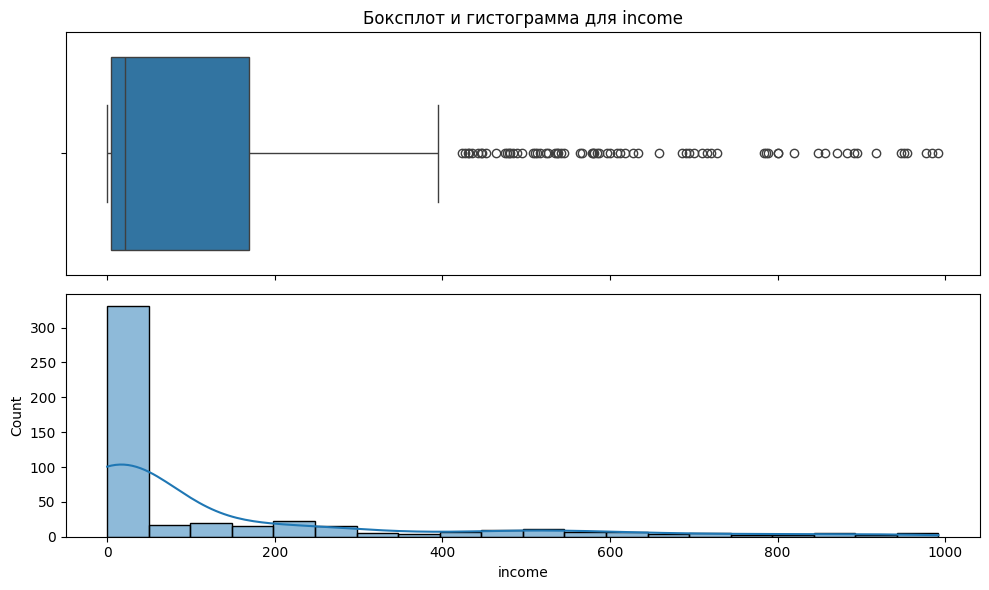

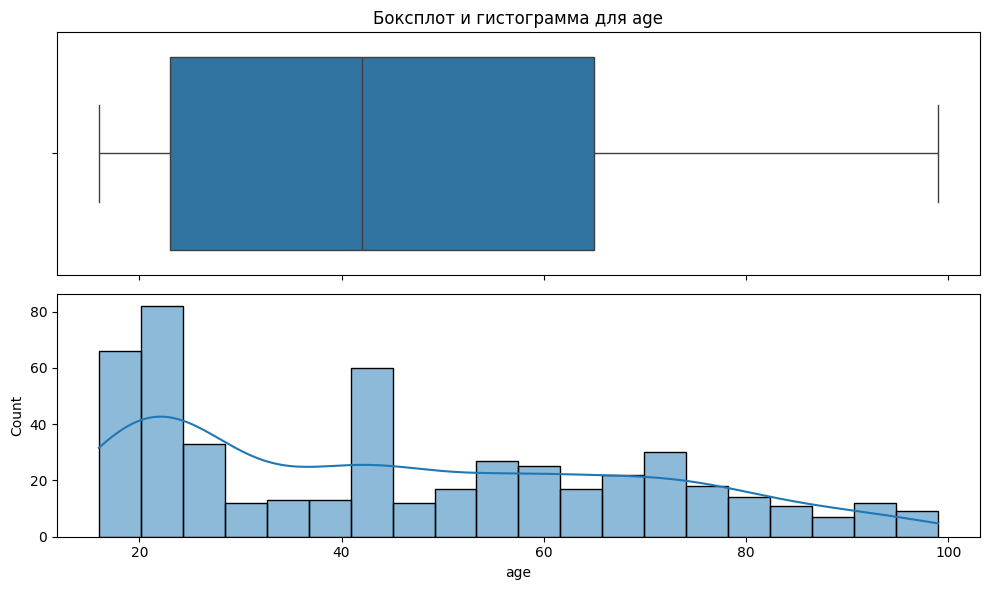

In [27]:
columns = homework.select_dtypes(include=['number']).columns
def px_box(data, column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6))
    sns.boxplot(data=data, x=column, ax=ax_box)
    sns.histplot(data[column], ax=ax_hist, bins=20, kde=True)
    ax_box.set_title(f'Боксплот и гистограмма для {column}')
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=column)
    plt.tight_layout()
    plt.show()
for column in columns:
    px_box(homework, column)

При сравнении со старыми графиками, мы видим:
* Медиана в признаке income сметилась ещё больше в лево, значит значения этого признака с статусом бизнесмен стали более отчётливые
* Распределение признака age избавилось от бимодальности

Посмотрим на паирплот и статистистические даные признаков


<Figure size 2000x2000 with 0 Axes>

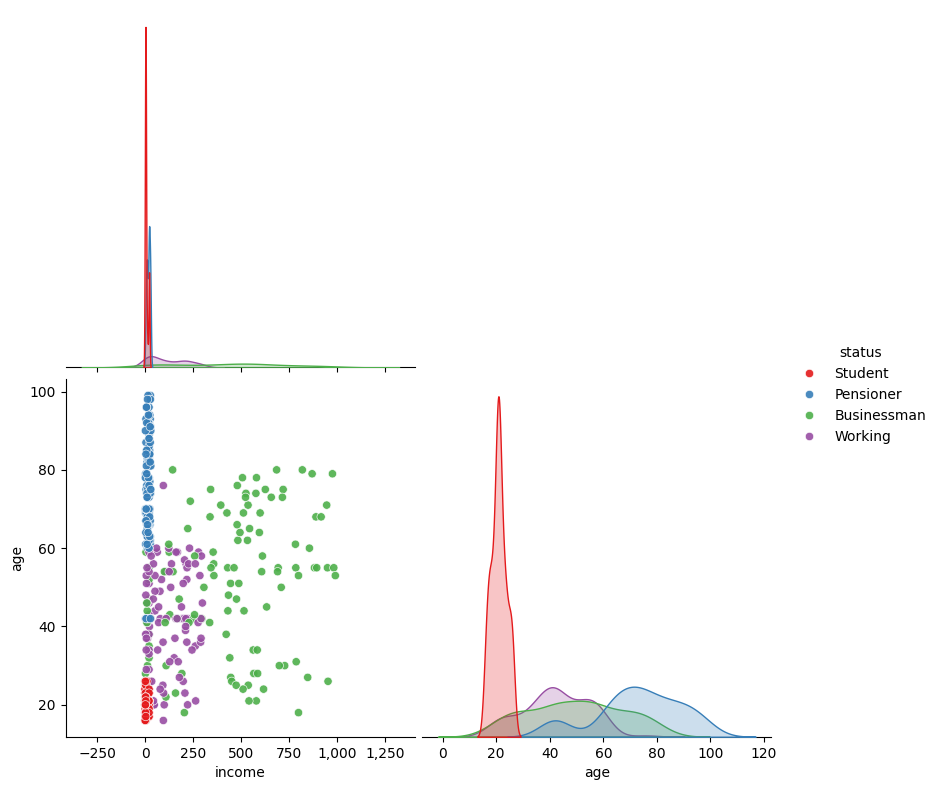

In [30]:
homework_no_index = homework.reset_index(drop=True)
plt.figure(figsize=(20, 20))
pairplot = sns.pairplot(
    homework_no_index, 
    hue='status',   # Ключ для группировки
    kind="scatter", 
    diag_kind="kde", # Для отображения диагональных графиков
    plot_kws={'alpha': 0.9},  # Задаем прозрачность точек
    palette='Set1',  # Цветовая палитра
    corner=True,
    height=4
)
for ax in pairplot.axes.flatten():  # Проходим по всем осям
    if ax is not None:  # Проверяем, что ось существует
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Формат для оси X
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Формат для оси Y
# Отображение графика
plt.show() # Отображаем график

In [31]:
homework.describe()

,income,age,date
count,500.000000,500.000000,500
mean,135.852264,45.778000,2022-01-16 05:48:28.800000256
min,0.000000,16.000000,2022-01-01 00:00:00
25%,5.000000,23.000000,2022-01-09 00:00:00
50%,21.000000,42.000000,2022-01-16 00:00:00
75%,169.000000,65.000000,2022-01-24 00:00:00
max,992.000000,99.000000,2022-02-01 00:00:00
std,228.334606,23.350186,NaN


Отлично! Мы видим что данные стали более адекватными!